In [5]:
import os
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data experiments

## Number of times hypothesis selected

In [6]:
tag = "log_ratio_"
results = []
for file_name in os.listdir("."):
    if tag in file_name:
        with open(file_name, "r") as f:
            ratio_results = json.load(f)

        results.append({
            "ratio": float(file_name.replace(tag, "")[:3]),
            "n_wins_1": ratio_results["n_wins_1"],
            "n_wins_2": ratio_results["n_wins_2"],
            "n_draws": ratio_results["n_draws"],
        })
results = pd.DataFrame.from_records(results)
results.head(2)

,ratio,n_wins_1,n_wins_2,n_draws
0,0.3,25,0,0
1,0.5,10,0,0


In [7]:
results = results.map(lambda x: min(x, 10))
results.head(2)

,ratio,n_wins_1,n_wins_2,n_draws
0,0.3,10,0,0
1,0.5,10,0,0


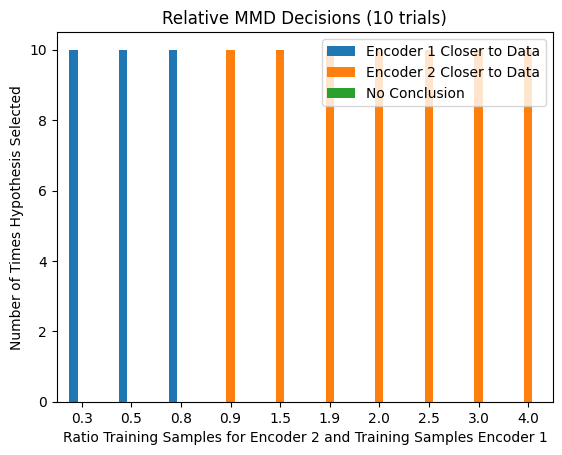

In [24]:
results.rename({"n_wins_1": "Encoder 1 Closer to Data", "n_wins_2": "Encoder 2 Closer to Data", "n_draws": "No Conclusion"}, axis="columns").plot.bar(x="ratio")
plt.title("Relative MMD Decisions (10 trials)")
plt.xlabel("Ratio Training Samples for Encoder 2 and Training Samples Encoder 1")
plt.ylabel("Number of Times Hypothesis Selected")
plt.xticks(rotation=0)
plt.legend(loc="upper right")

## Acccuracy

In [25]:
#results are taken from WandB dashboard here: https://wandb.ai/dmitriykornilov_team/Maximum%20mean%20discrepancy%20test/table?workspace=user-dmitriykornilov
results_acc = {
    "ratio": [0.3, 0.5, 0.8, 0.9, 1.5, 1.9, 2, 2.5, 3, 4],
    "accuracy_1": [0.9289, 0.9162, 0.9123, 0.9026, 0.9012, 0.9044, 0.9057, 0.9061, 0.8927, 0.8982],
    "accuracy_2": [0.9136, 0.9083, 0.9061, 0.9071, 0.9124, 0.9141, 0.9054, 0.9073, 0.9027, 0.9117]
}
results_acc = pd.DataFrame(results_acc)
results_acc.head(2)

,ratio,accuracy_1,accuracy_2
0,0.3,0.9289,0.9136
1,0.5,0.9162,0.9083


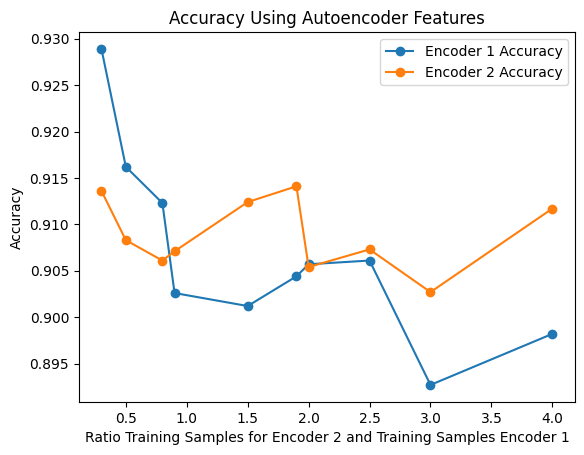

In [31]:
results_acc.rename({"accuracy_1": "Encoder 1 Accuracy", "accuracy_2": "Encoder 2 Accuracy"}, axis="columns").plot(x="ratio", marker="o")
plt.title("Accuracy Using Autoencoder Features")
plt.xlabel("Ratio Training Samples for Encoder 2 and Training Samples Encoder 1")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend(loc="upper right")

# Architecture experiments

In [46]:
tag = "log_hu2="
results = []
for file_name in os.listdir("."):
    if tag in file_name:
        with open(file_name, "r") as f:
            run_results = json.load(f)

        results.append({
            "hu2": int(file_name.split("=")[1].split("_")[0]),
            "dimz2": int(file_name.split("=")[2].split(".")[0]),
            "n_wins_1": run_results["n_wins_1"],
            "n_wins_2": run_results["n_wins_2"],
            "n_draws": run_results["n_draws"],
        })
results = pd.DataFrame.from_records(results).sort_values(["dimz2", "hu2"]).reset_index(drop=True)
results

,hu2,dimz2,n_wins_1,n_wins_2,n_draws
0,200,5,10,0,0
1,200,20,0,10,0
2,800,20,10,0,0
3,400,50,10,0,0
4,50,400,0,10,0
5,20,800,0,10,0
6,50,800,0,10,0


In [47]:
#results are taken from WandB dashboard here: https://wandb.ai/dmitriykornilov_team/Maximum%20mean%20discrepancy%20test/table?workspace=user-dmitriykornilov
results_acc = [
    {
        "hu2": 20,
        "dimz2": 800,
        "accuracy_1": 0.8778,
        "accuracy_2": 0.6024
    },
    {
        "hu2": 200,
        "dimz2": 5,
        "accuracy_1": 0.877,
        "accuracy_2": 0.8278
    },
    {
        "hu2": 800,
        "dimz2": 20,
        "accuracy_1": 0.8813,
        "accuracy_2": 0.8741
    },
    {
        "hu2": 200,
        "dimz2": 20,
        "accuracy_1": 0.8784,
        "accuracy_2": 0.8864
    },
    {
        "hu2": 50,
        "dimz2": 400,
        "accuracy_1": 0.8822,
        "accuracy_2": 0.8736
    },
    {
        "hu2": 50,
        "dimz2": 800,
        "accuracy_1": 0.8853,
        "accuracy_2": 0.8232
    },
    {
        "hu2": 400,
        "dimz2": 50,
        "accuracy_1": 0.8877,
        "accuracy_2": 0.9007
    }
]
results_acc = pd.DataFrame.from_records(results_acc).sort_values(["dimz2", "hu2"]).reset_index(drop=True)
results_acc

,hu2,dimz2,accuracy_1,accuracy_2
0,200,5,0.8770,0.8278
1,200,20,0.8784,0.8864
2,800,20,0.8813,0.8741
3,400,50,0.8877,0.9007
4,50,400,0.8822,0.8736
5,20,800,0.8778,0.6024
6,50,800,0.8853,0.8232


In [48]:
results_all = results.join(results_acc.drop(["hu2", "dimz2"], axis="columns"))
results_all

,hu2,dimz2,n_wins_1,n_wins_2,n_draws,accuracy_1,accuracy_2
0,200,5,10,0,0,0.8770,0.8278
1,200,20,0,10,0,0.8784,0.8864
2,800,20,10,0,0,0.8813,0.8741
3,400,50,10,0,0,0.8877,0.9007
4,50,400,0,10,0,0.8822,0.8736
5,20,800,0,10,0,0.8778,0.6024
6,50,800,0,10,0,0.8853,0.8232
